# Creating Image Classification Dataset - Demo Script

## 1- Create a Dataset

## 1.1- Folder Structure

In order to use "create_image_classification_dataset" function, the directory path of image collection must be defined as a string variable.


The function gets the path and use it to create datasets in HDF5 format. Then, creates a folder with "dataset-" prefix in same directory and puts the dataset files in it.


The folder structure should be as follows:


![alt text](diagrams/pre-create-diagram.jpg "Folder structure before create")

When you run the function, it will create "dataset-" folder and its dataset elements like as follows:

![alt text](diagrams/post-create-diagram-2.jpg "Folder structure before create")

## 1.2- Run the Function

In [5]:
from Dataset import create_image_classification_dataset, load_image_classification_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_root = "My_Image_Collections/cats_and_dogs"
size_sample_px = 128
ratio_split_val = 0.2
ratio_split_test = 0.1

create_image_classification_dataset(path_root, size_sample_px, ratio_split_test, ratio_split_val)

The Processing Log:

Importing dataset...
*green light... tik... tok... red light...*
Eleminating broken files.
File eleminated: cat - 140.jpg
File eleminated: cat - 92.jpg
File eleminated: dog - 264.jpg

Classes of The Dataset: ['cat', 'dog']
Data Input Size: 603 files
Dataset Size: 600 images
Detected broken files: 3
Shuffled randomly.
Split index-1: 420
Split index-2: 540

Shapes:
Train set:	 (420, 128, 128, 3)
Train labels:	 (1, 420)
Val. set:	 (120, 128, 128, 3)
Val. labes:	 (1, 120)
Test set:	 (60, 128, 128, 3)
Test labes:	 (1, 60)

Dataset files created.
You can find your dataset files in 'dataset-cats_and_dogs' directory.
Broken files log created.
You can find the log file in 'dataset-cats_and_dogs' directory.
Execution time: 0.04 mins.


## 2- Load a Dataset

In order to load the dataset that we created before, we can use "load_image_classification_dataset" function.


To do this, the full path of dataset folder must be defined as a string variable.


In [1]:
full_path_of_my_dataset = "/home/MyName/Desktop/MyEnvironment/image_collections/dataset-cats_and_dogs" 

Alternatively, we can use the relative path of dataset folder (But it can be risky, it can cause path issues for different operating systems.) 

In [2]:
relative_path_of_my_dataset = "image_collections/dataset-cats_and_dogs"

Finally, we can run the function. It returns a dictionary which contains dataset arrays in "ndarray" format.

In [8]:
dataset = load_image_classification_dataset(path_full=full_path_of_my_dataset)

Imported: test_cats_and_dogs.h5
Imported: val_cats_and_dogs.h5
Imported: classes_cats_and_dogs.h5
Imported: train_cats_and_dogs.h5

Class names: [b'cat' b'dog'] and Shape: (2,)
Number of - X_test Samples: 60
Shape  of - X_test: (60, 128, 128, 3), X_test Labels: (1, 60)
Number of - X_val Samples: 120
Shape  of - X_val: (120, 128, 128, 3), X_val Labels: (1, 120)
Number of - X_train Samples: 420
Shape  of - X_train: (420, 128, 128, 3), X_train Labels: (1, 420)

VARIABLES RETURNED: X_test, Y_test, X_val, Y_val, classes, X_train, Y_train


We can get dataset elements by unpacking the returned variable.

In [9]:
x_train = dataset["X_train"]
y_train = dataset["Y_train"]
x_val = dataset["X_val"]
y_val = dataset["Y_val"]
x_test = dataset["X_test"]
y_test = dataset["Y_test"]
classes = dataset["classes"]

Additional Note: The class names in "classes" list variable will be encoded "bytes" object format. When we get them as a string, we need to decode as "utf-8" format. 

In [12]:
print(classes)

[b'cat' b'dog']


In [15]:
print(classes[0].decode("utf-8"))

cat


## 3- Show random examples from loaded datasets

### 3.1- Train Set

class: cat


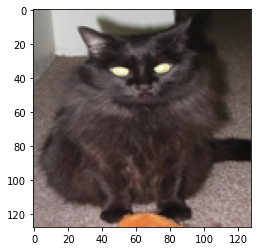

In [4]:
rand_ind_train = np.random.randint(x_train.shape[0])
print("class:",classes[y_train[0,rand_ind_train]].decode("utf-8"))
plt.imshow(x_train[rand_ind_train])

### 3.2- Validation Set

Class type: dog


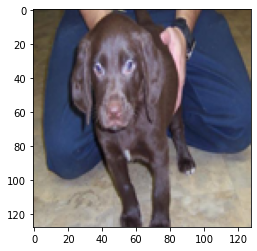

In [5]:
rand_ind_val = np.random.randint(x_val.shape[0])
print("Class type:",classes[y_val[0,rand_ind_val]].decode("utf-8"))
plt.imshow(x_val[rand_ind_val])

### 3.3- Test Set

class: dog


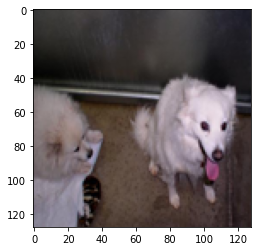

In [6]:
rand_ind_test = np.random.randint(x_test.shape[0])
print("class:",classes[y_test[0,rand_ind_test]].decode("utf-8"))
plt.imshow(x_test[rand_ind_test])